# 1. Comparing classifiers. 

## 2. Part Two (Handwritten digits classification).

This question is to compare different classifiers and their performance for multi-class classifications
on the complete MNIST dataset at http://yann.lecun.com/exdb/mnist/. You can find the data
file mnist 10digits.mat in the homework folder. The MNIST database of handwritten digits has a
training set of 60,000 examples, and a test set of 10,000 examples. We will compare KNN, logistic
regression, SVM, kernel SVM, and neural networks.
1

• We suggest you to “standardize” the features before training the classifiers, by dividing the values
of the features by 255 (thus map the range of the features from [0, 255] to [0, 1]).

• You may adjust the number of neighbors K used in KNN to have a reasonable result (you may
use cross validation but it is not required; any reasonable tuning to get good result is acceptable).

• You may use a neural networks function sklearn.neural network with hidden layer sizes = (20, 10).

• For kernel SVM, you may use radial basis function kernel, and a heuristic called “median trick”:
choose the parameter of the kernel K(x, x0
) = exp{−kx − x
0k
2/(2σ
2
)}. Choose the bandwidth
as σ =
p
M/2 where M = the median of {kx
i − x
jk
2
, 1 ≤ i, j ≤ m0
, i 6= j} for pairs of training
samples. Here you can randomly choose m0 = 1000 samples from training data to use for the
“median trick”1
.

• For KNN and SVM, you can randomly downsample the training data to size m = 5000, to improve
computation efficiency.
Train the classifiers on training dataset and evaluate on the test dataset.

**(a) Report confusion matrix, precision, recall, and F-1 score for each of the classifiers. For
precision, recall, and F-1 score of each classifier, we will need to report these for each of the digits.
**

In [52]:
xtrain = loadmat('data/mnist_10digits.mat')['xtrain']
ytrain = loadmat('data/mnist_10digits.mat')['ytrain']
xtest = loadmat('data/mnist_10digits.mat')['xtest']
ytest = loadmat('data/mnist_10digits.mat')['ytest']
# images = images.T
xtest = xtest / 255
xtrain = xtrain / 255
ytrain = ytrain.T
ytest = ytest.T

sample = sample_without_replacement(n_population = len(xtrain), n_samples = 5000, random_state = 11)

In [53]:
start = time.time()
knnmodel = KNeighborsClassifier(5)
knnmodel.fit(xtrain[sample], ytrain[sample].ravel())
ypred = knnmodel.predict(xtest)
print(f"KNN score: {knnmodel.score(xtest, ytest.ravel())}")
print(f"Took {time.time() - start} seconds")

KNN score: 0.9367
Took 157.7562472820282 seconds


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.89      1.00      0.94      1135
           2       0.98      0.89      0.93      1032
           3       0.93      0.95      0.94      1010
           4       0.95      0.91      0.93       982
           5       0.94      0.91      0.93       892
           6       0.94      0.97      0.96       958
           7       0.93      0.93      0.93      1028
           8       0.97      0.88      0.93       974
           9       0.90      0.93      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



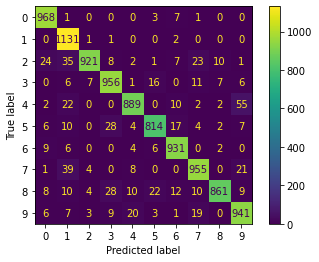

In [54]:
# for i, x in enumerate(multilabel_confusion_matrix(ytest, ypred)):
#     print(f"Confusion matrix for label {i}:")
#     print(pd.DataFrame(x))
print(plot_confusion_matrix(knnmodel, xtest, ytest))
print(classification_report(ytest, ypred))

In [55]:
start = time.time()
logmodel = LogisticRegression(max_iter = 2000)
logmodel.fit(xtrain, ytrain.ravel())
ypred = logmodel.predict(xtest)
print(f"Logistic Regression score: {logmodel.score(xtest, ytest.ravel())}")
print(f"Took {time.time() - start} seconds")

Logistic Regression score: 0.9256
Took 235.06768035888672 seconds


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



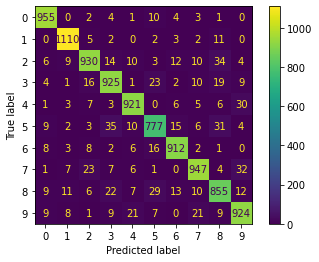

In [56]:
print(plot_confusion_matrix(logmodel, xtest, ytest))
print(classification_report(ytest, ypred))

In [57]:
start = time.time()
svmmodel = SVC(kernel = 'linear')
svmmodel.fit(xtrain[sample], ytrain[sample].ravel())
ypred = svmmodel.predict(xtest)
print(f"SVM score: {svmmodel.score(xtest, ytest.ravel())}")
print(f"Took {time.time() - start} seconds")

SVM score: 0.9071
Took 41.50218319892883 seconds


              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.94      0.98      0.96      1135
           2       0.89      0.89      0.89      1032
           3       0.86      0.90      0.88      1010
           4       0.91      0.92      0.91       982
           5       0.88      0.85      0.86       892
           6       0.93      0.95      0.94       958
           7       0.92      0.89      0.90      1028
           8       0.92      0.83      0.87       974
           9       0.89      0.88      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



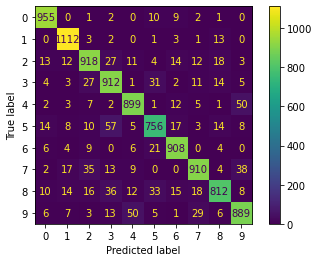

In [58]:
print(plot_confusion_matrix(svmmodel, xtest, ytest))
print(classification_report(ytest, ypred))

In [59]:
start = time.time()
ksvmmodel = SVC(kernel = 'rbf')
ksvmmodel.fit(xtrain[sample], ytrain[sample].ravel())
ypred = ksvmmodel.predict(xtest)
print(f"Kernel SVM score: {ksvmmodel.score(xtest, ytest.ravel())}")
print(f"Took {time.time() - start} seconds")

Kernel SVM score: 0.9537
Took 62.57912516593933 seconds


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.95      0.93      0.94       892
           6       0.95      0.98      0.97       958
           7       0.95      0.94      0.95      1028
           8       0.94      0.93      0.94       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



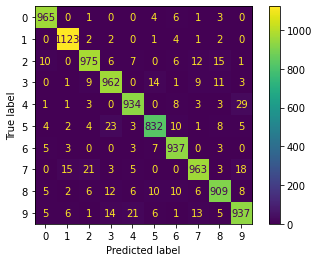

In [60]:
print(plot_confusion_matrix(ksvmmodel, xtest, ytest))
print(classification_report(ytest, ypred))

In [61]:
start = time.time()
nnmodel = MLPClassifier(hidden_layer_sizes = (20, 10), max_iter = 2000)
nnmodel.fit(xtrain[sample], ytrain[sample].ravel())
ypred = nnmodel.predict(xtest)
print(f"Neural Network score: {nnmodel.score(xtest, ytest.ravel())}")
print(f"Took {time.time() - start} seconds")

Neural Network score: 0.9088
Took 26.431808710098267 seconds


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.87      0.89      1032
           3       0.86      0.90      0.88      1010
           4       0.92      0.90      0.91       982
           5       0.87      0.86      0.87       892
           6       0.90      0.94      0.92       958
           7       0.91      0.91      0.91      1028
           8       0.89      0.86      0.88       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



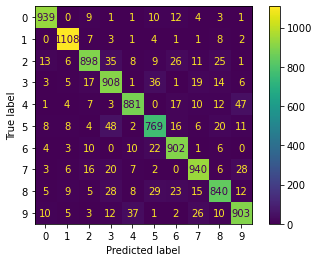

In [62]:
print(plot_confusion_matrix(nnmodel, xtest, ytest))
print(classification_report(ytest, ypred))

**(b) (10 points) Comment on the performance of the classifier and give your explanation why some of
them perform better than the others.**

Here's the accuracies achived with each model:

| KNN | Log Reg | SVM | KSVM | NN  |
|-----|---------|-----|------|-----|
| 94% | 93%     | 91% | 95%  | 91% |

We can see that all models did a fairly good job of prediciting the digits, but a couple did better than the others--KNN and Gaussian SVM, followed by Logistic Regression. I would explain this be suggesting that these 2 best-performing algorithms are defined more locally and do not try to greate linear boundaries. KNN makes very noisy boundaries based around details for each data point, and KSVM with the rbf kernel also makes somewhat noisy boundaries directly in the feature space. Intuitively, it makes sense that these models might be more successful, because we know that hand-drawn digits can be complicated and have very fine lines between, for isntance, a 3 and an 8, or a 1 and a 7.

# 2. Naive Bayes for spam filtering.

In this problem, we will use the Naive Bayes algorithm to fit a spam filter by hand. This will enhance your
understanding to Bayes classifier and build intuition. This question does not involve any programming but
only derivation and hand calculation.
Spam filters are used in all email services to classify received emails as “Spam” or “Not Spam”. A simple
approach involves maintaining a vocabulary of words that commonly occur in “Spam” emails and classifying
an email as “Spam” if the number of words from the dictionary that are present in the email is over a certain
threshold. We are given the vocabulary consists of 15 words
V = {secret, offer, low, price, valued, customer, today, dollar, million, sports, is, for, play, healthy, pizza}.
We will use Vi to represent the ith word in V . As our training dataset, we are also given 3 example spam
messages,

• million dollar offer
• secret offer today
• secret is secret

and 4 example non-spam messages

• low price for valued customer
• play secret sports today
• sports is healthy
• low price pizza

Recall that the Naive Bayes classifier assumes the probability of an input depends on its input feature.
The feature for each sample is defined as x
(i) = [x
(i)
1
, x
(i)
2
, . . . , x
(i)
d
]
T
, i = 1, . . . , m and the class of the ith
sample is y
(i)
. In our case the length of the input vector is d = 15, which is equal to the number of words
in the vocabulary V . Each entry x
(i)
j
is equal to the number of times word Vj occurs in the i-th message.


**1. Calculate class prior P(y = 0) and P(y = 1) from the training data, where y = 0 corresponds
to spam messages, and y = 1 corresponds to non-spam messages. Note that these class prior essentially
corresponds to the frequency of each class in the training sample. Write down the feature vectors for
each spam and non-spam messages.**

    **Priors:**

    P(y=1) = 3/7

    P(y=0) = 4/7



    **Feature Vectors for messages:**

| message# | SPAM?    | secret | offer | low | price | valued | customer | today | dollar | million | sports | is | for | play | healthy | pizza |
|----------|----------|--------|-------|-----|-------|--------|----------|-------|--------|---------|--------|----|-----|------|---------|-------|
| 1        | not spam | 0      | 0     | 1   | 1     | 1      | 1        | 0     | 0      | 0       | 0      | 0  | 1   | 0    | 0       | 0     |
| 2        | not spam | 1      | 0     | 0   | 0     | 0      | 0        | 1     | 0      | 0       | 1      | 0  | 0   | 1    | 0       | 0     |
| 3        | not spam | 0      | 0     | 0   | 0     | 0      | 0        | 0     | 0      | 0       | 1      | 1  | 0   | 0    | 1       | 0     |
| 4        | not spam | 0      | 0     | 1   | 1     | 0      | 0        | 0     | 0      | 0       | 0      | 0  | 0   | 0    | 0       | 1     |
| 5        | spam     | 0      | 1     | 0   | 0     | 0      | 0        | 0     | 1      | 1       | 0      | 0  | 0   | 0    | 0       | 0     |
| 6        | spam     | 1      | 1     | 0   | 0     | 0      | 0        | 1     | 0      | 0       | 0      | 0  | 0   | 0    | 0       | 0     |
| 7        | spam     | 2      | 0     | 0   | 0     | 0      | 0        | 0     | 0      | 0       | 0      | 1  | 0   | 0    | 0       | 0     |

**2. (In the Naive Bayes model, assuming the keywords are independent of each other (this is a
simplification), the likelihood of a sentence with its feature vector x given a class c is given by
P(x|y = c) = Y
d
k=1
θ
xk
c,k, c = {0, 1}
where 0 ≤ θc,k ≤ 1 is the probability of word k appearing in class c, which satisfies
X
d
k=1
θc,k = 1, c = {0, 1}.
Given this, the complete log-likelihood function for our training data is given by
(θ0,1, . . . , θ0,d, θ1,1, . . . , θ1,d) = Xm
i=1
X
d
k=1
x
(i)
k
log θy(i),k
(In this example, m = 7.) Calculate the maximum likelihood estimates of θ0,1, θ0,7, θ1,1, θ1,15 by
maximizing the log-likelihood function above.
(Hint: We are solving a constrained maximization problem and you will need to introduce Lagrangian
multipliers and consider the Lagrangian function.)**

We want to maximize the following:

$$ \ell(\theta_{0,1},...,\theta_{0,d},\theta_{1,1},...,\theta_{1.d}) = \sum^m_{i=1} \sum^d_{k=1} x^i_k log \theta_{y^i,k} $$

subject to:

$$ \sum^d_{k=1} \theta_{c,k} = 1  ,  c = {0,1} $$

The Lagrangian is thus:

$$ L(\theta_{c,k}, \lambda_1, \lambda_2)  = \sum^m_{i=1} \sum^d_{k=1} x^i_k log \theta_{y^i,k} + \lambda_1(\sum^d_{k=1} \theta_{0,k} - 1) + \lambda_2(\sum^d_{k=1} \theta_{1,k} - 1) $$

If we then differentiate with respect to $\theta$ and then set that to zero we get:
$$\theta_{c,k} = \frac{x^i_k} {\lambda}$$

If we then substitue the above term in the constraints, to that $\sum^d_{k=1} \theta_{0,k} - 1 = \sum^d_{k=1} \frac{x^i_k}{\lambda} - 1$, solve for lambda, and then plug back into our above expressions we get:

$$\theta_{c,k} = \frac{x^i_k} {\sum^d_{k=1} x^i_k}$$

The resulting values for $\theta_{0,1}, \theta_{0,7}, \theta_{1,1}, \theta_{1,15}, \theta_{1,11}$ are:

| theta      | $\theta_{0,1}$   | $\theta_{0,7}$   | $\theta_{1,1}$    | $\theta_{1,15}$   | $\theta_{1,7}$    | $\theta_{0,11}$  | $\theta_{1,11}$   |
|------------|------------------|------------------|-------------------|-------------------|-------------------|------------------|-------------------|
| likelihood | 3/9 = .333       | 1/9 = .1111      | 1/15 = .0666      | 1/15 = .0666      | 1/15 = .0666      | 1/9 = .1111      | 1/15 = .0666      |
| prior      | 3/7 = .4285      | 3/7 = .4285      | 4/7 = .5714       | 4/7 = .5714       | 4/7 = .5714       | 3/7 = .4285      | 4/7 = .5714       |
| bayes      | .4285*.333=.1428 | .4285*.111=.0476 | .5714*.0666=.0381 | .5714*.0666=.0381 | .5714*.0666=.0381 | .4285*.111=.0476 | .5714*.0666=.0381 |

We included $\theta_{1,11}$,  $\theta_{0,11}$, and $\theta_{1,7}$ because we will need that in the next question.

**3. Given a test message “today is secret”, using the Naive Bayes classier that you have trained
in Part (a)-(b), to calculate the posterior and decide whether it is spam or not spam.**

We need to make 2 calculation here: One as if the message was spam, and one as if the mssage was not spam.

Spam = $prior$ * $\theta_{0,1}$ * $\theta_{0,7}$ * $\theta_{0,11}$ 

$$ = .4285 * .3333 * .1111 * .1111 = .00176 $$

Non- Spam = $prior$ * $\theta_{1,1}$ * $\theta_{1,7}$ * $\theta_{1,11}$

$$ = .5714 * .0666 * .0666 * .0666 = .00017 $$

Because .00176 > .00017, we classify this message as a Spam message.